# K means



**Determinar el método óptimo de cluster**

- **Método del codo (Elbow Method)**, consiste en trazar la suma de las distancias al cuadrado entre cada punto de datos y su centroide asignado para diferentes valores de k. En este método, buscamos el valor de k donde la disminución en la suma de las distancias al cuadrado se ralentiza y forma una curva similar a un codo. Este valor de k se considera como el número óptimo de clústeres.

- **Método de la Silueta**, consiste en calcular el coeficiente de silueta para diferentes valores de k. Este coeficiente es una medida que evalúa cuán parecido está un punto de datos a su clúster asignado en comparación con los otros clústeres. Básicamente, se cuantifica qué tan bien se agrupa un punto con respecto a su propio clúster en comparación con otros clústeres cercanos. Al probar diferentes valores de k y calcular los coeficientes de silueta correspondientes, podemos determinar qué valor de k maximiza el coeficiente de silueta promedio.

- **Método de estadística de brecha**, se evalúa la variación dentro de los clústeres para diferentes valores de k en comparación con una distribución de referencia nula. Básicamente, se compara cómo los datos están agrupados para distintos números de clústeres con lo que esperaríamos si los datos estuvieran distribuidos de manera aleatoria y sin estructura. El valor de k que maximiza la brecha, es considerado el número óptimo de clusters.

**Inicializar los k centroides**

- **Inicialización aleatoria**: se seleccionan k centroides de manera aleatoria de entre los puntos de datos. Este es un método simple y comúnmente utilizado, pero puede dar lugar a agrupaciones subóptimas si los centroides iniciales no representan adecuadamente la distribución de los datos.

- **Inicialización K-means++**: es una técnica de inicialización que selecciona k centroides de manera estratégica, eligiendo el primer centroide de forma aleatoria y luego seleccionando los centroides restantes basándose en la distancia respecto a los previamente elegidos. Este enfoque ayuda a evitar agrupamientos subóptimos y mejora la calidad de agrupamiento en comparación con la inicialización aleatoria en el algoritmo K-Means.

- **Inicialización manual**: en algunos casos, el usuario puede tener conocimiento previo sobre los datos y los clústeres esperados, de esta forma puede especificar manualmente los centroides iniciales.

In [3]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score



/tmp/ipykernel_46884/2417863389.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


Se utiliza el `dataset` [`california-housing-prices`](https://www.kaggle.com/datasets/camnugent/california-housing-prices?resource=download) que contiene datos relacionados a la vivienda del estado de California. En el ejemplo, se van a usar los datos de `longitude`, `latitude` y `median_house_value`. Y eliminamos cualquier fila que tenga valores faltantes (NaN)

In [4]:
# cargar  el dataset
data= pd.read_csv('housing.csv', usecols=['longitude','latitude','median_house_value'])

# eliminar los valores nulos
data.dropna(inplace=True)

# información de data
print(data.info())

# descripción de data
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   median_house_value  20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB
None
          longitude      latitude  median_house_value
count  20640.000000  20640.000000        20640.000000
mean    -119.569704     35.631861       206855.816909
std        2.003532      2.135952       115395.615874
min     -124.350000     32.540000        14999.000000
25%     -121.800000     33.930000       119600.000000
50%     -118.490000     34.260000       179700.000000
75%     -118.010000     37.710000       264725.000000
max     -114.310000     41.950000       500001.000000


Grafía de disperción del `dataset`, colocando los valores en los ejes de `longitude`, `latitude` y el traibuto `hue` se coloca el valor `median_house_value`, para analizar la relación entre las coordenadas de longitud y latitud con el valor medio de vivienda

<Axes: xlabel='longitude', ylabel='latitude'>

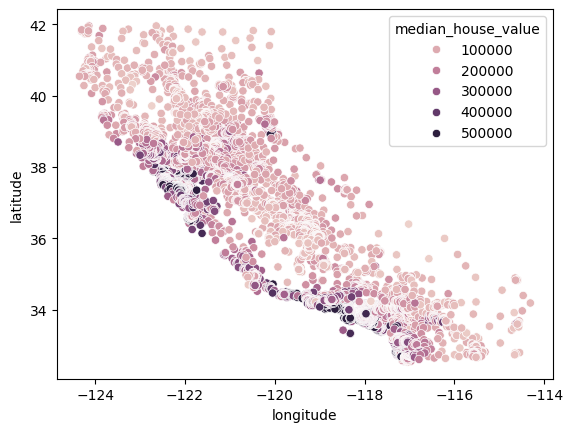

In [5]:
sns.scatterplot(data =data, x='longitude', y='latitude', hue='median_house_value')

## StandarScaler

Al escalar los datos, se asegura que tengan un ranfo y una varianza similares, lo que traer beneficios al algortimo, se facilita su comparación y evitamos que características con escalas muy diferentes tengan mayor presencia en el algoritmo.

![scaler_stand.png](scaler_stand.png)

In [6]:
# instancia de StandardScaler
scaler = StandardScaler()

# escalar los datos
data_scaled = scaler.fit_transform(data)

## K means

Se inicializa una lista vacía llamada `silhouette_scores` para almacenar los puntajes de silueta. Luego, se itera a través del rango de valores k desde 2 hasta 10. Para cada valor de k, se crea una instancia de la clase KMeans con k clústeres y ajustamos los datos escalados al modelo.

A continuación, se calcula el puntaje de silueta para los datos agrupados utilizando la función `silhouette_score`, que mide la calidad de los resultados de agrupamiento. El puntaje resultante se agrega a la lista `silhouette_scores`.

Finalmente, se representa gráficamente los puntajes de silueta frente a los valores de `k`, donde el eje x representa el número de clústeres (k) y el eje y representa el coeficiente de silueta. 

In [20]:
# puntajes de silueta para diferentes números de clústeres (K)
silhouette_scores = []

# rango de número de clústeres
for k in range(2, 11):
    # instancia de KMeans
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42, algorithm='elkan')
    # ajustar el modelo
    kmeans.fit(data_scaled)
    # puntaje de silueta
    score = silhouette_score(data_scaled, kmeans.labels_,metric='sqeuclidean')
    # agregar el puntaje a la lista
    silhouette_scores.append(score)

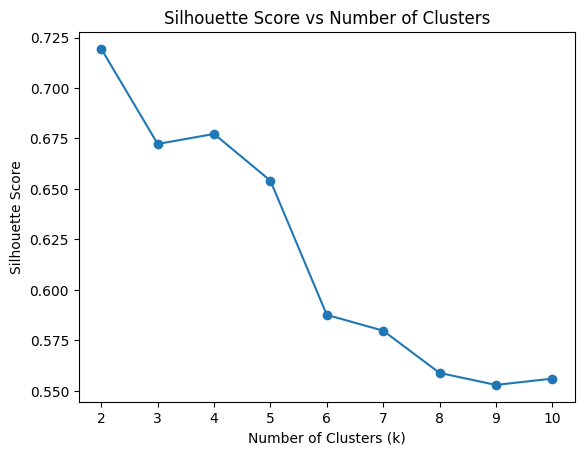

In [21]:
# graficamos los puntajes de silueta para diferentes números de clústeres

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

Se establece el número de clústeres (k) en 2, dividiendo los datos en dos grupos distintos. Luego, se crea una instancia de la clase KMeans con el número especificado de clústeres. Se usa K-Means++ como método de inicialización, que es ampliamente utilizado y ayuda a mejorar la convergencia del algoritmo. Además, establecemos un valor de `random state` de 42 para garantizar la reproducibilidad de los resultados.

Después de eso, se ajusta los datos escalados al modelo KMeans utilizando el método fit(). Este proceso calcula los centroides de los clústeres y asigna cada punto de datos a su clúster correspondiente en función de la proximidad de los centroides.



In [17]:
# clusters con k=2
k=2

# instancia de KMeans utilizando 'kmeans++' para inicialización
kmeans = KMeans(n_clusters=k, init='k-means++',random_state=42, verbose=1)

# ajustar el modelo
kmeans.fit(data_scaled)

Initialization complete
Iteration 0, inertia 40663.760253102344.
Iteration 1, inertia 27307.52380708692.
Iteration 2, inertia 26769.418779859832.
Converged at iteration 2: center shift 9.019784539688542e-05 within tolerance 9.999999999999899e-05.


KMeans(n_clusters=2, random_state=42, verbose=1)

## Resultado
Finalmente, se optinen las etiquetas de los clústeres y los centroides, y se configura las etiquetas del gráfico de dispersión para mostrar el gráfico.

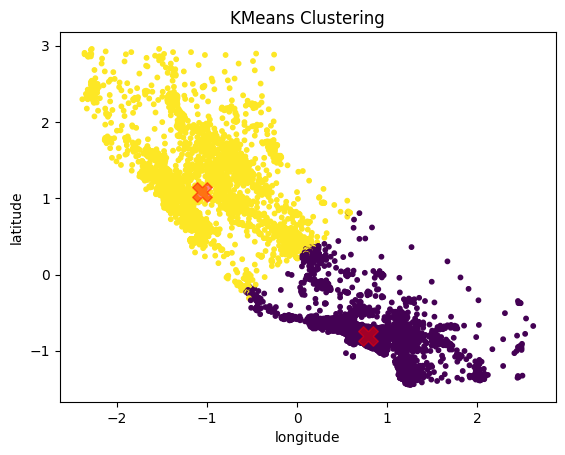

In [16]:
# se optine los cluster y las etiquetas de los centroide
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# grafico de disperción
plt.scatter(data_scaled[:,0], data_scaled[:,1], c=labels,s=10, cmap='viridis')
plt.scatter(centroids[:,0], centroids[:,1], marker='X',c='red', s=200, alpha=0.5)
plt.xlabel('longitude')
plt.ylabel('latitude')  
plt.title('KMeans Clustering')
plt.show()
